In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import cv2
import extcolors

/var/folders/gg/kh8xl_wd53994214jm_jrd180000gn/T/ipykernel_58246/840218943.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width, hsize), Image.ANTIALIAS)


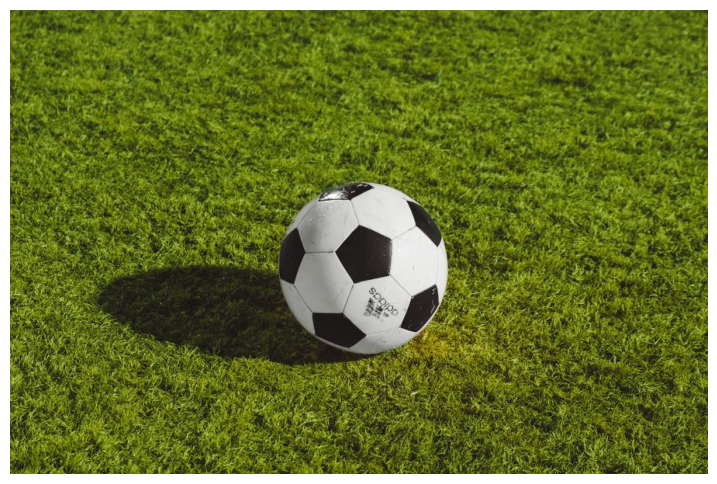

([((61, 75, 0), 153760),
  ((81, 99, 0), 146654),
  ((112, 131, 23), 96465),
  ((29, 25, 24), 27307),
  ((44, 55, 0), 27024),
  ((44, 42, 27), 16756),
  ((111, 122, 46), 16370),
  ((234, 234, 232), 12095),
  ((140, 161, 44), 10720),
  ((150, 151, 146), 9445),
  ((90, 98, 41), 6021),
  ((143, 155, 73), 3913)],
 539100)

In [47]:
input_name = "fotboll.jpg"
output_width = 900
img = Image.open(input_name)
wpercent = output_width / float(img.size[0])
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((output_width, hsize), Image.ANTIALIAS)

resize_name = "resize_" + input_name
img.save(resize_name)

plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis("off")
plt.show()

colors_x = extcolors.extract_from_path(img_url, tolerance=12, limit=12)
colors_x

In [48]:
def rgb2hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(rgb[0], rgb[1], rgb[2])


def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    rgb = [df_rgb[i].replace("(", "").replace(")", "") for i, _ in enumerate(df_rgb)]
    df_color_up = []
    
    for color in rgb:
        color_palette = color.split(", ")
        hex_color = rgb2hex([int(i) for i in color_palette])
        df_color_up.append(hex_color)
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#3d4b00,153760
1,#516300,146654
2,#708317,96465
3,#1d1918,27307
4,#2c3700,27024
5,#2c2a1b,16756
6,#6f7a2e,16370
7,#eaeae8,12095
8,#8ca12c,10720
9,#969792,9445


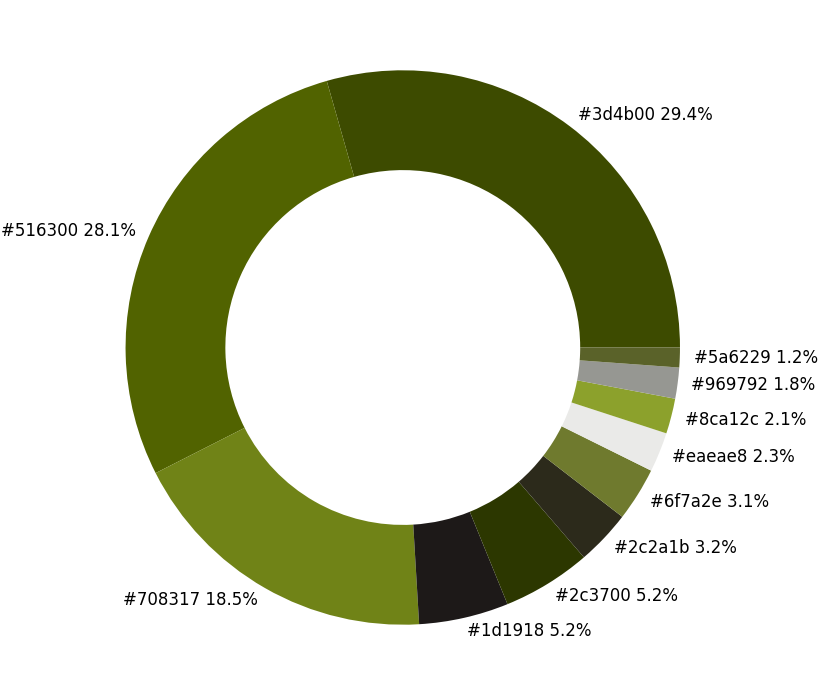

In [49]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()